### Import Libraries

In [1]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os, shutil

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Building Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten

# Training Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Machine learning model       
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV

# importing warnings
import warnings
# Ignoring all future warnings to avoid unnecessary warning messages during execution
warnings.simplefilter(action='ignore', category=FutureWarning)
# Ignoring all deprecation warnings to avoid unnecessary warning messages during execution
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')

### Loading dataset

In [2]:
# # Dateset
# folder = 'Data/Training/glioma_tumor/'
# count = 1

# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "GL_" +str(count)+".jpg"
#     os.rename(source, destination)
#     count+=1
# print('All files have been rename in glioma dir')

In [3]:
# folder = 'Data/Training/malignant_tumor/'
# count = 1

# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "MA_" +str(count)+".jpg"
#     os.rename(source, destination)
#     count+=1
# print('All files have been rename in malignant dir')

In [4]:
# folder = 'Data/Training/meningioma_tumor/'
# count = 1

# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "ME_" +str(count)+".jpg"
#     os.rename(source, destination)
#     count+=1
# print('All files have been rename in meningioma dir')

In [5]:
# folder = 'Data/Training/no_tumor/'
# count = 1

# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "NT_" +str(count)+".jpg"
#     os.rename(source, destination)
#     count+=1
# print('All files have been rename in no_tumor dir')

In [6]:
# folder = 'Data/Training/pituitary_tumor/'
# count = 1

# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "PT_" +str(count)+".jpg"
#     os.rename(source, destination)
#     count+=1
# print('All files have been rename in pituitary dir')

In [7]:
classes=[]
filename='Data'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)

['glioma_tumor', 'malignant_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [8]:
def get_data_labels(directory):
    paths = []
    labels = []
    
    # Loop through each subdirectory in the given directory
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        
        # Check if it's a directory
        if os.path.isdir(label_dir):
            # Loop through each file in the subdirectory
            for file in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file)
                paths.append(file_path)
                labels.append(label)
    
    return paths, labels

In [9]:
# File paths for training and testing
train_dir ='Data/Training'
test_dir ='Data/Testing'

# Getting data using above function
train_paths, train_labels = get_data_labels(train_dir) 
test_paths, test_labels = get_data_labels(test_dir) 

# Printing traing and testing sample sizes
print('Training')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print('\nTesting')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

Training
Number of Paths: 6871
Number of Labels: 6871

Testing
Number of Paths: 1668
Number of Labels: 1668


### Configuration

In [10]:
batch_size = 32
image_size = (168, 168)
SEED = 111

### Exploratory Data Analysis

Data Information

In [11]:
train_data = 'Data/Training/'

filepaths = []
labels = []


folds = os.listdir(train_data)

for fold in folds:
    foldpath = os.path.join(train_data, fold)
    
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        
        filepaths.append(fpath)
        labels.append(fold)
        

train_df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
train_df

,filepaths,labels
0,Data/Training/glioma_tumor\GL_1.jpg,glioma_tumor
1,Data/Training/glioma_tumor\GL_10.jpg,glioma_tumor
2,Data/Training/glioma_tumor\GL_100.jpg,glioma_tumor
3,Data/Training/glioma_tumor\GL_1000.jpg,glioma_tumor
4,Data/Training/glioma_tumor\GL_1001.jpg,glioma_tumor
...,...,...
6866,Data/Training/pituitary_tumor\PT_995.jpg,pituitary_tumor
6867,Data/Training/pituitary_tumor\PT_996.jpg,pituitary_tumor
6868,Data/Training/pituitary_tumor\PT_997.jpg,pituitary_tumor
6869,Data/Training/pituitary_tumor\PT_998.jpg,pituitary_tumor


In [12]:
test_data = 'Data/Testing/'

filepaths = []
labels = []


folds = os.listdir(test_data)

for fold in folds:
    foldpath = os.path.join(test_data, fold)
    
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        
        filepaths.append(fpath)
        labels.append(fold)
        

test_df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
test_df

,filepaths,labels
0,Data/Testing/glioma\Te-glTr_0000.jpg,glioma
1,Data/Testing/glioma\Te-glTr_0001.jpg,glioma
2,Data/Testing/glioma\Te-glTr_0002.jpg,glioma
3,Data/Testing/glioma\Te-glTr_0003.jpg,glioma
4,Data/Testing/glioma\Te-glTr_0004.jpg,glioma
...,...,...
1663,Data/Testing/pituitary\Te-pi_0295.jpg,pituitary
1664,Data/Testing/pituitary\Te-pi_0296.jpg,pituitary
1665,Data/Testing/pituitary\Te-pi_0297.jpg,pituitary
1666,Data/Testing/pituitary\Te-pi_0298.jpg,pituitary


In [13]:
# size of training data
train_df.shape

(6871, 2)

In [14]:
train_df.size

13742

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  6871 non-null   object
 1   labels     6871 non-null   object
dtypes: object(2)
memory usage: 107.5+ KB


Data Visualization

In [16]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [17]:
# Extract labels from train_df
classes = train_df['labels'].unique()

GLIOMA_TUMOR


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\USER\AppData\Local\Temp\ipykernel_12920\4170506853.py:5: SyntaxWarning: invalid escape sequence '\T'
  path_to_visualize = f"Data\Training/{label}"


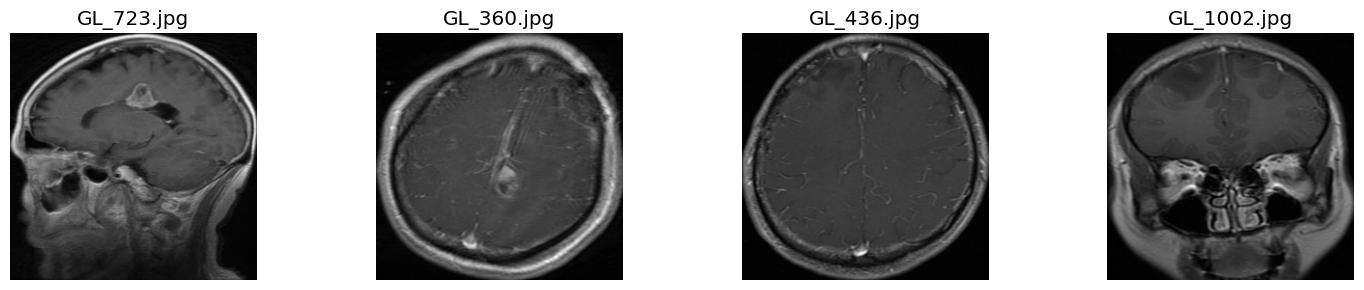

MALIGNANT_TUMOR


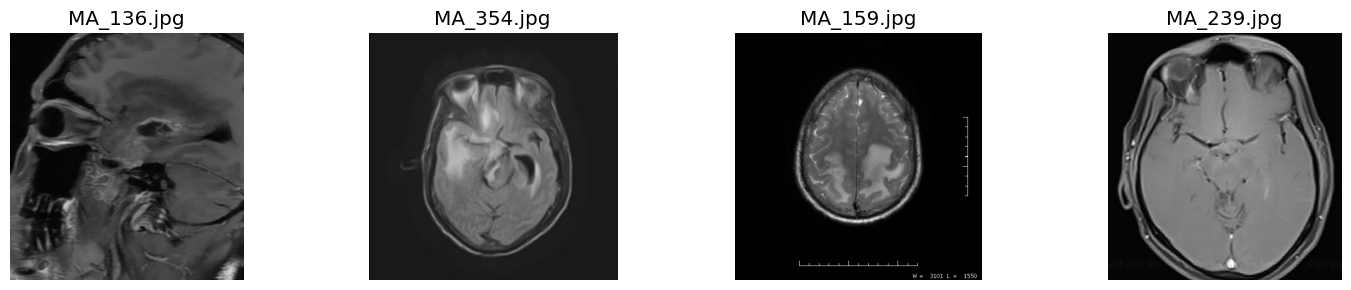

MENINGIOMA_TUMOR


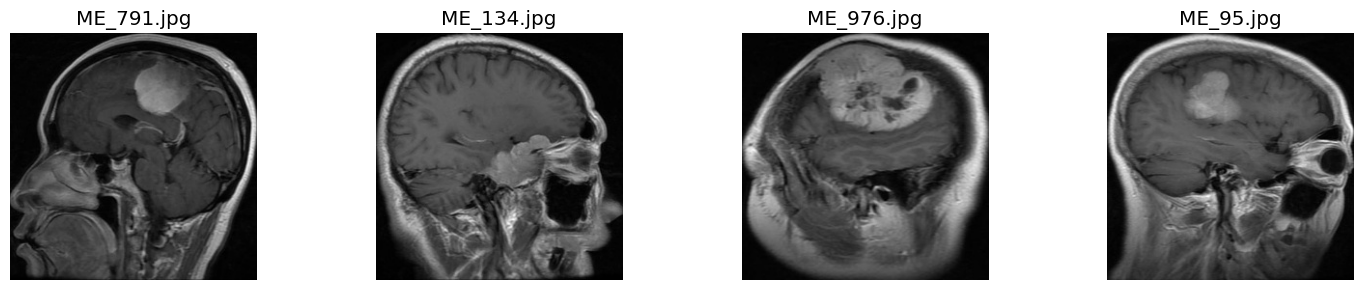

NO_TUMOR


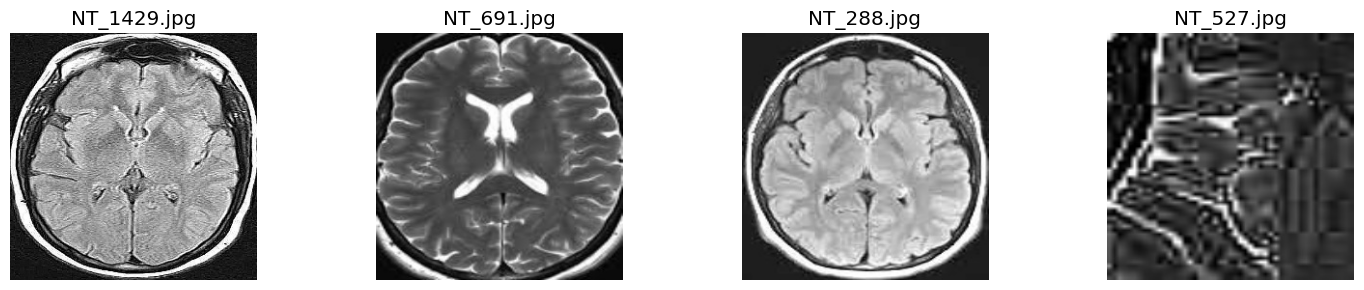

PITUITARY_TUMOR


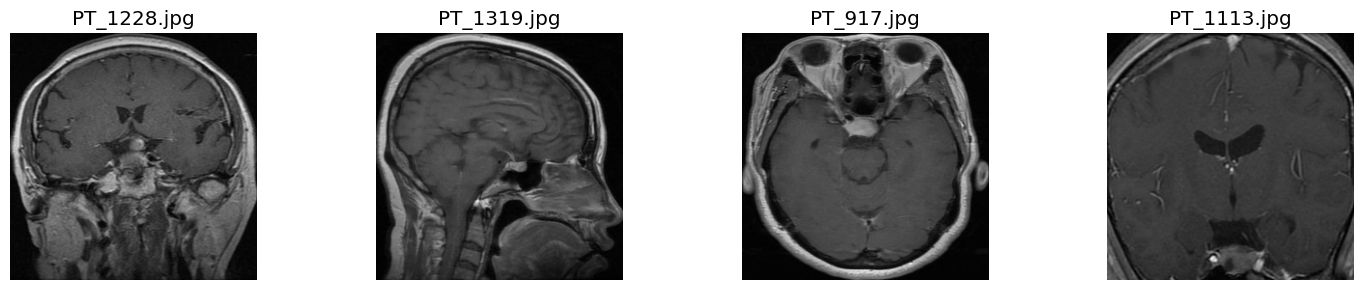

In [18]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"Data\Training/{label}"

    # Visualize 3 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

In [19]:
train_df['labels'].value_counts()

labels
no_tumor            1595
pituitary_tumor     1457
meningioma_tumor    1339
glioma_tumor        1321
malignant_tumor     1159
Name: count, dtype: int64

In [20]:
from tabulate import tabulate
# Data: Labels and counts
data = [
    ['no_tumor', 1595],
    ['pituitary_tumor', 1457],
    ['meningioma_tumor', 1339],
    ['glioma_tumor', 1321],
    ['malignant_tumor', 1159]
]

# Table headers
headers = ["labels", "count"]

# Display the table using tabulate
print(tabulate(data, headers, tablefmt="grid"))

+------------------+---------+
| labels           |   count |
+==================+=========+
| no_tumor         |    1595 |
+------------------+---------+
| pituitary_tumor  |    1457 |
+------------------+---------+
| meningioma_tumor |    1339 |
+------------------+---------+
| glioma_tumor     |    1321 |
+------------------+---------+
| malignant_tumor  |    1159 |
+------------------+---------+


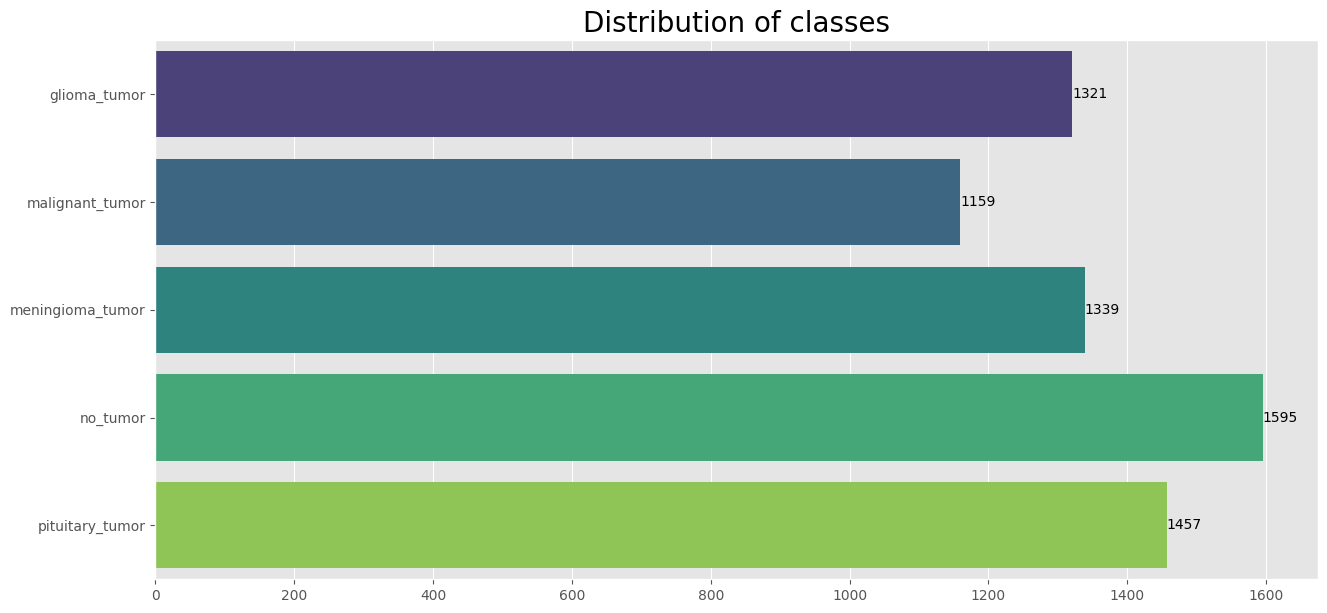

In [21]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_df , y=train_df['labels'], palette='viridis')

plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of classes', fontsize=20)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

### Data Preprocessing and Augmentation

In [22]:
# Initialize data augmentation techniques
train_datagen = ImageDataGenerator(#rescale=1./255,
                                   validation_split=0.2, 
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.02,
                                   height_shift_range=0.02,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest",
                                    # rescale=1.0 / 255,        # Normalize pixel values to [0, 1]
                                    # rotation_range=15,
                                    # width_shift_range=0.1,
                                    # height_shift_range=0.1,
                                    # horizontal_flip=True,
                                    # brightness_range=[0.8, 1.2],
                                    # validation_split=0.2
)

In [23]:
# Apply data augmentation
train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=image_size,
                                    class_mode="categorical",
                                    batch_size=batch_size,
                                    subset='training')
train_images, train_labels = next(train_generator)

Found 5499 images belonging to 5 classes.


In [24]:
validation_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=image_size,
                                    class_mode="categorical",
                                    batch_size=batch_size,
                                    subset='validation')
val_images, val_labels = next(validation_generator)

Found 1372 images belonging to 5 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                    test_dir,
                                    target_size=image_size,
                                    class_mode="categorical",
                                    batch_size=batch_size,)

test_images, test_labels = next(test_generator)

Found 1668 images belonging to 5 classes.


Visualizing augmented data

In [ ]:
# Using ImageDataGenerator instance
class_dict = train_generator.class_indices
classes = list(class_dict.keys())
num_classes = len(classes)
num_images_per_class = 4  # Number of images to display per class

plt.figure(figsize=(20, 20))

# Loop through each class index
for class_index, class_name in enumerate(classes):
    # Get a generator for the current class
    generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(168, 168),
        class_mode='categorical',
        batch_size=num_images_per_class,
        classes=[class_name],  
        shuffle=True,
        seed=42)

    # Get a batch of augmented images
    images, labels = next(generator)

    # Display the images
    for i in range(num_images_per_class):
        plt.subplot(num_classes, num_images_per_class, class_index * num_images_per_class + i + 1)
        plt.imshow(images[i])
        plt.title(class_name, color='k', fontsize=15)
        plt.axis('off')

plt.tight_layout()
plt.show()

Training Setup

In [27]:
import math
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 15

# Epoch steps
steps_per_epoch = math.ceil(train_generator.samples / batch_size)

# Epoch steps
validation_steps = math.ceil(validation_generator.samples / batch_size)

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps_per_epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Image shape: (168, 168, 3)
Epochs: 15
Batch size: 32
Steps_per_epoch: 172
Validation steps: 43


### Building Hybrid Model

In [28]:
#Building CNN Model
#CNN model definition with BatchNormalization, Dropout, and padding

#Define the model
def custom_cnn(input_shape=image_shape):
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape, name='conv1'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))# 
    model.add(Dropout(0.3))

    # Third Convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv4'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Flattening and Dense layers with Dropout
    model.add(Flatten())
    model.add(Dense(512, activation='relu', name='dense_1'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Additional Dense layer
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    

    #Output layer for 5 classes (softmax activation)
    model.add(Dense(5, activation='softmax', name='dense_3'))
    
    return model

In [29]:
# Instantiate and compile the model
input_shape = image_shape  # Set according to your data
model = custom_cnn(input_shape)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 168, 168, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 84, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 84, 84, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 56448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    28,901,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,074,021 (110.91 MB)

 Trainable params: 29,072,357 (110.90 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [31]:
# Compile the model
model.compile(Adam(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

Model Architecture

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


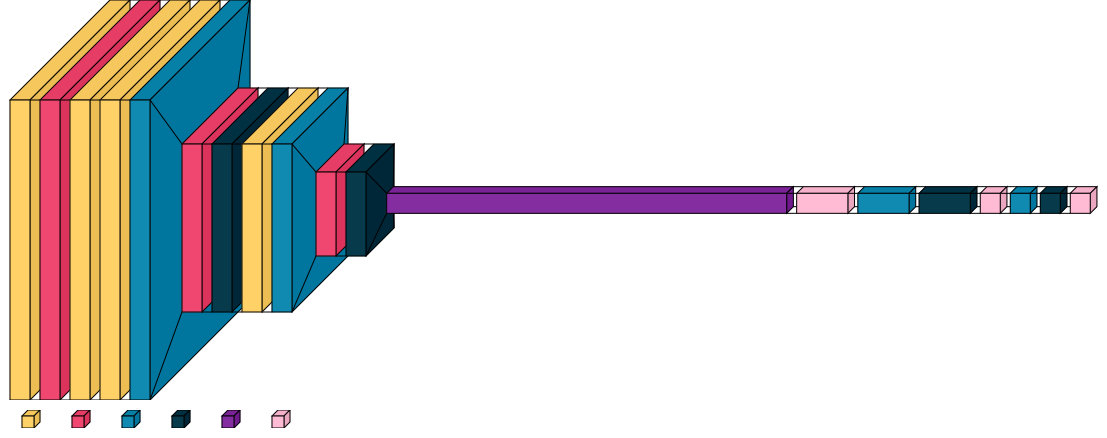

In [32]:
from visualkeras import layered_view

# Visualize the model
layered_view(model, legend=True, max_xy=300)

In [33]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=False)
model_rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=False)
checkpoint = ModelCheckpoint('best_model.keras', 
                             monitor='val_accuracy',  
                             verbose=1,               
                             save_best_only=True,      
                             mode='max',)     

In [34]:
# Model training
hist_nn = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    callbacks=[model_es, model_rlrp],
                    shuffle= True)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.5591 - loss: 1.2645 - precision: 0.6142 - recall: 0.4929 - val_accuracy: 0.5138 - val_loss: 1.6971 - val_precision: 0.5410 - val_recall: 0.4810 - learning_rate: 0.0010
Epoch 2/15


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


172/172 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4942 - val_loss: 1.6810 - val_precision: 0.5175 - val_recall: 0.4643 - learning_rate: 0.0010
Epoch 3/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 477s 3s/step - accuracy: 0.6851 - loss: 0.8809 - precision: 0.7290 - recall: 0.6106 - val_accuracy: 0.5620 - val_loss: 2.5439 - val_precision: 0.5644 - val_recall: 0.5590 - learning_rate: 0.0010
Epoch 4/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5474 - val_loss: 2.5643 - val_precision: 0.5518 - val_recall: 0.5437 - learning_rate: 0.0010
Epoch 5/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.7199 - loss: 0.7249 - precision: 0.7665 - recall: 0.6685 - val_accuracy: 0.5547 - val_loss: 1.6294 - val_precision: 0.5587 - val_recall: 0.5379 - learning_rate: 0.0010
Epoch 6/15
172/172 ━━━━━━━━━━━━━━━━

### ML Model

Feature Extraction

In [35]:
# Modify the model for feature extraction
feature_extractor = Sequential(model.layers[:-1])

In [36]:
# Extract features from training and validation sets
def extract_features(generator, feature_extractor):
    features = []
    labels = []
    for batch, label_batch in generator:
        feature_batch = feature_extractor.predict(batch)
        features.extend(feature_batch)
        labels.extend(label_batch)
        if len(features) >= generator.samples:
            break
    return np.array(features), np.argmax(np.array(labels), axis=1)

In [37]:
# Get features and labels for both train and validation sets
train_features, train_labels = extract_features(train_generator, feature_extractor)
val_features, val_labels = extract_features(validation_generator, feature_extractor)
# test_features, test_labels = extract_features(test_generator, feature_extractor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [38]:
# Train Random Forest using train_features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_labels)

RandomForestClassifier(random_state=42)

In [39]:
# Initialize Logistic Regression and XGBoost classifiers
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Train Logistic Regression
log_reg_model.fit(train_features, train_labels)

# Train XGBoost
xgb_model.fit(train_features, train_labels)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### Model Evaluation

In [40]:
# Define a function to print evaluation metrics
def evaluate_model(model, features, labels, name):
    predictions = model.predict(features)
    proba_predictions = model.predict_proba(features)

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    recall = recall_score(labels, predictions, average='weighted')
    precision = precision_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    # For multi-class, use the 'ovr' option to calculate ROC AUC
    if len(set(labels)) > 2:  # Check if it's multi-class
        roc_auc = roc_auc_score(labels, proba_predictions, multi_class='ovr')
    else:  # For binary classification
        roc_auc = roc_auc_score(labels, proba_predictions[:, 1])

    # Print results
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(labels, predictions)}\n")




In [41]:
# Evaluate base model on the train and validation set
evaluate_model(log_reg_model, train_features, train_labels, "Logistic Regression")
evaluate_model(log_reg_model, val_features, val_labels, "Logistic Regression")

Logistic Regression Evaluation:
Accuracy: 0.90
Recall: 0.90
Precision: 0.90
F1 Score: 0.90
ROC AUC: 0.99
Confusion Matrix:
[[ 876    1  132    7   42]
 [   0  930    0    2    0]
 [ 117    3  825   54   67]
 [  12    6   26 1222   10]
 [  20    1   48    7 1091]]

Logistic Regression Evaluation:
Accuracy: 0.89
Recall: 0.89
Precision: 0.89
F1 Score: 0.89
ROC AUC: 0.98
Confusion Matrix:
[[227   0  23   0  12]
 [  3 209   3  13   0]
 [ 39   0 202   4  23]
 [  1   0  13 312   1]
 [  6   0  12   2 267]]



In [42]:
# Evaluate random forest model on the train and validation set
evaluate_model(rf_model, train_features, train_labels, "Random Forest")
evaluate_model(rf_model, val_features, val_labels, "Random Forest")

Random Forest Evaluation:
Accuracy: 1.00
Recall: 1.00
Precision: 1.00
F1 Score: 1.00
ROC AUC: 1.00
Confusion Matrix:
[[1058    0    0    0    0]
 [   0  932    0    0    0]
 [   0    0 1066    0    0]
 [   0    0    0 1276    0]
 [   0    0    0    0 1167]]

Random Forest Evaluation:
Accuracy: 0.89
Recall: 0.89
Precision: 0.89
F1 Score: 0.89
ROC AUC: 0.98
Confusion Matrix:
[[218   0  30   3  11]
 [  2 205   1  20   0]
 [ 30   1 209   4  24]
 [  1   0   7 317   2]
 [  5   0   8   2 272]]



In [43]:
# Evaluate XGBoost model on the train and validation set
evaluate_model(xgb_model, train_features, train_labels, "XGBoost")
evaluate_model(xgb_model, val_features, val_labels, "XGBoost")

XGBoost Evaluation:
Accuracy: 1.00
Recall: 1.00
Precision: 1.00
F1 Score: 1.00
ROC AUC: 1.00
Confusion Matrix:
[[1058    0    0    0    0]
 [   0  932    0    0    0]
 [   0    0 1066    0    0]
 [   0    0    0 1276    0]
 [   0    0    0    0 1167]]

XGBoost Evaluation:
Accuracy: 0.90
Recall: 0.90
Precision: 0.90
F1 Score: 0.90
ROC AUC: 0.98
Confusion Matrix:
[[226   0  24   1  11]
 [  2 208   1  17   0]
 [ 31   0 213   3  21]
 [  1   1   8 317   0]
 [  7   0   3   3 274]]



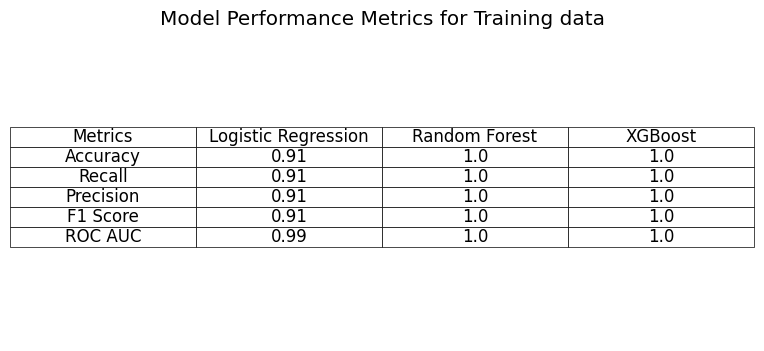

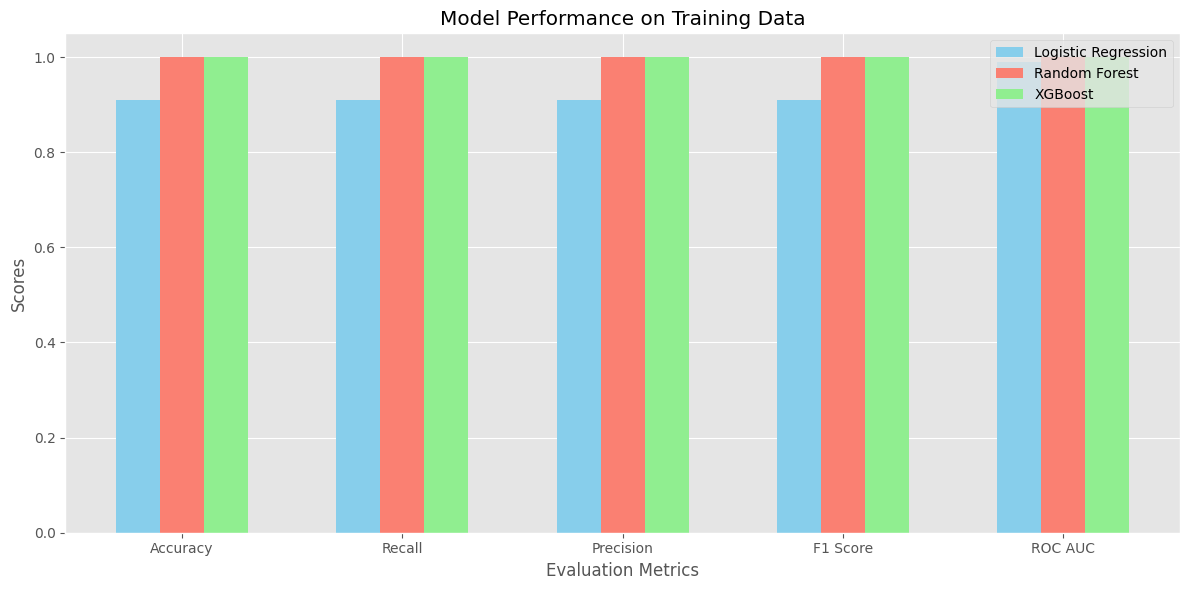

In [44]:
# Metrics and their values for each model
metrics = ["Accuracy", "Recall", "Precision", "F1 Score", "ROC AUC"]
logistic_regression_scores = [0.91, 0.91, 0.91, 0.91, 0.99]
random_forest_scores = [1.00, 1.00, 1.00, 1.00, 1.00]
xgboost_scores = [1.00, 1.00, 1.00, 1.00, 1.00]

# Create a table of results
data = {
    "Metrics": metrics,
    "Logistic Regression": logistic_regression_scores,
    "Random Forest": random_forest_scores,
    "XGBoost": xgboost_scores,
}

# Convert to numpy array for better formatting
table_data = np.array([data["Metrics"], 
                        data["Logistic Regression"], 
                        data["Random Forest"], 
                        data["XGBoost"]]).T

# Plotting the table
fig, ax = plt.subplots(figsize=(8, 4))  # Create a new figure for the table
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data,
                 colLabels=["Metrics", "Logistic Regression", "Random Forest", "XGBoost"],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)  # Activate font size scaling
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the table size

plt.title("Model Performance Metrics for Training data")
plt.show()

# Now plotting the bar chart
x = np.arange(len(metrics))
width = 0.2  # Width of each bar

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, logistic_regression_scores, width, label='Logistic Regression', color='skyblue')
ax.bar(x, random_forest_scores, width, label='Random Forest', color='salmon')
ax.bar(x + width, xgboost_scores, width, label='XGBoost', color='lightgreen')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance on Training Data')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

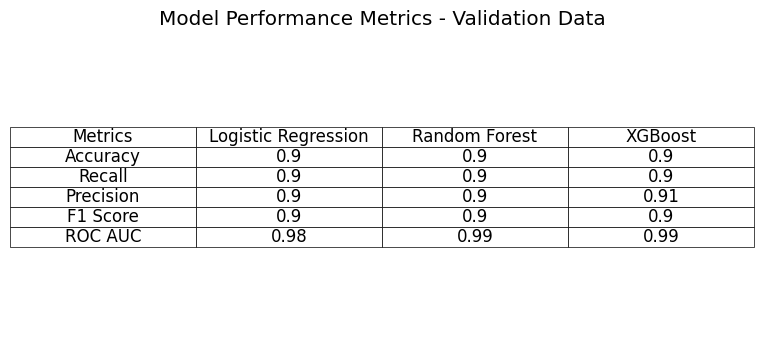

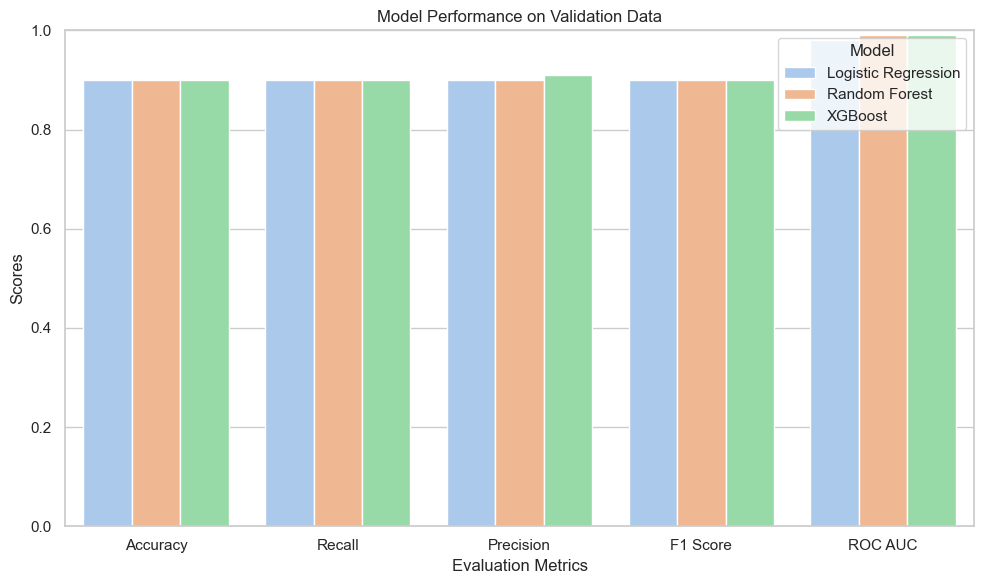

In [45]:
# Validation metrics and their values for each model
validation_metrics = ["Accuracy", "Recall", "Precision", "F1 Score", "ROC AUC"]
logistic_regression_validation_scores = [0.90, 0.90, 0.90, 0.90, 0.98]
random_forest_validation_scores = [0.90, 0.90, 0.90, 0.90, 0.99]
xgboost_validation_scores = [0.90, 0.90, 0.91, 0.90, 0.99]

# Create a DataFrame for better handling with Seaborn
validation_data = pd.DataFrame({
    "Metrics": validation_metrics,
    "Logistic Regression": logistic_regression_validation_scores,
    "Random Forest": random_forest_validation_scores,
    "XGBoost": xgboost_validation_scores,
})

# Plotting the validation table
fig, ax = plt.subplots(figsize=(8, 4))  # Create a new figure for the table
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=validation_data.values,
                 colLabels=validation_data.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)  # Activate font size scaling
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the table size

plt.title("Model Performance Metrics - Validation Data")
plt.show()

# Melt the DataFrame for use with Seaborn
validation_data_melted = validation_data.melt(id_vars='Metrics', 
                                                var_name='Model', 
                                                value_name='Score')

# Set the visual style
sns.set(style="whitegrid")

# Plotting the validation bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=validation_data_melted, x='Metrics', y='Score', hue='Model', palette='pastel')

# Adding labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Scores')
plt.title('Model Performance on Validation Data')
plt.ylim(0, 1)  # Set y-axis limits to 0-1
plt.legend(title='Model')
plt.tight_layout()

# Display the plot
plt.show()

Training confusion matrix

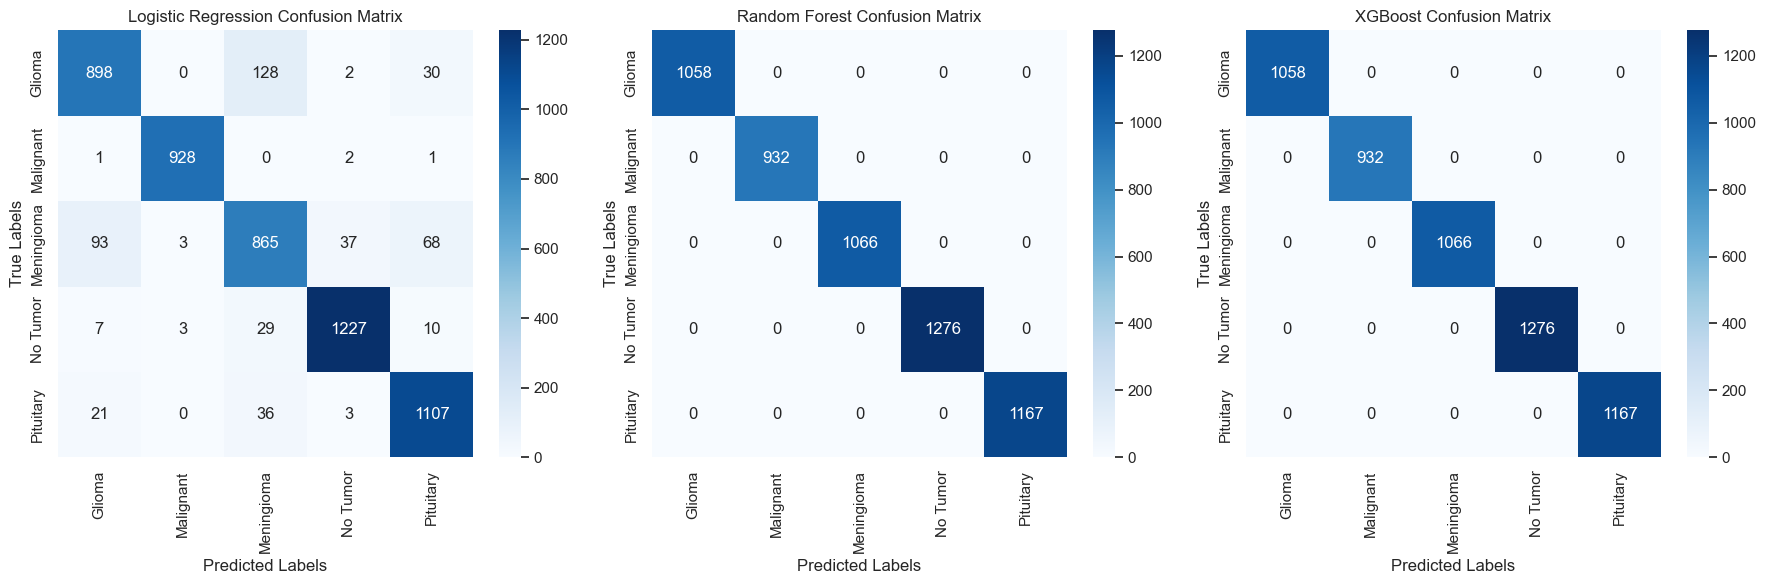

In [46]:
# Define class names
class_names = ['Glioma', 'Malignant', 'Meningioma', 'No Tumor', 'Pituitary']

# Updated Confusion Matrices for Training Data
logistic_conf_matrix = np.array([
    [898, 0, 128, 2, 30],
    [1, 928, 0, 2, 1],
    [93, 3, 865, 37, 68],
    [7, 3, 29, 1227, 10],
    [21, 0, 36, 3, 1107]
])

rf_conf_matrix = np.array([
    [1058, 0, 0, 0, 0],
    [0, 932, 0, 0, 0],
    [0, 0, 1066, 0, 0],
    [0, 0, 0, 1276, 0],
    [0, 0, 0, 0, 1167]
])

xgboost_conf_matrix = np.array([
    [1058, 0, 0, 0, 0],
    [0, 932, 0, 0, 0],
    [0, 0, 1066, 0, 0],
    [0, 0, 0, 1276, 0],
    [0, 0, 0, 0, 1167]
])

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Logistic Regression Confusion Matrix
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Plot Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Plot XGBoost Confusion Matrix
sns.heatmap(xgboost_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_title("XGBoost Confusion Matrix")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

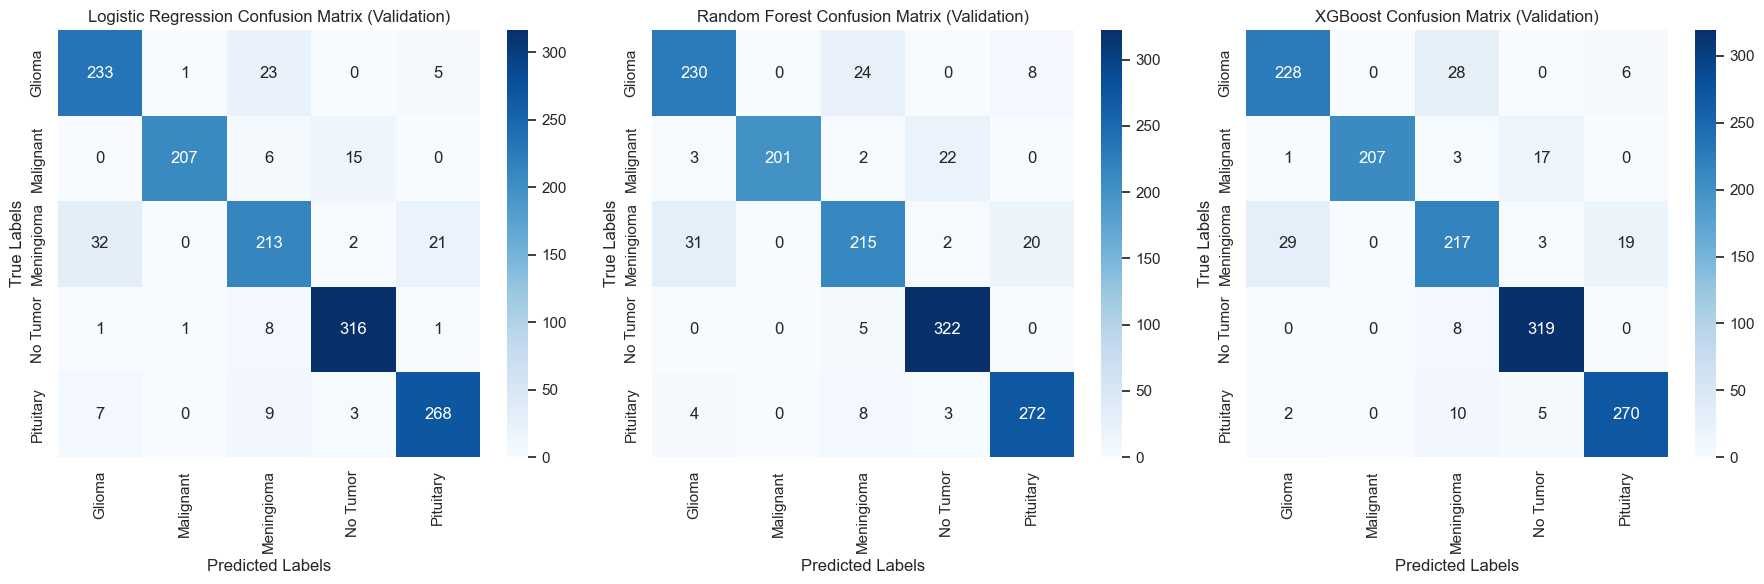

In [47]:
# Define class names
class_names = ['Glioma', 'Malignant', 'Meningioma', 'No Tumor', 'Pituitary']

# Validation Confusion Matrices
logistic_conf_matrix_val = np.array([
    [233, 1, 23, 0, 5],
    [0, 207, 6, 15, 0],
    [32, 0, 213, 2, 21],
    [1, 1, 8, 316, 1],
    [7, 0, 9, 3, 268]
])

rf_conf_matrix_val = np.array([
    [230, 0, 24, 0, 8],
    [3, 201, 2, 22, 0],
    [31, 0, 215, 2, 20],
    [0, 0, 5, 322, 0],
    [4, 0, 8, 3, 272]
])

xgboost_conf_matrix_val = np.array([
    [228, 0, 28, 0, 6],
    [1, 207, 3, 17, 0],
    [29, 0, 217, 3, 19],
    [0, 0, 8, 319, 0],
    [2, 0, 10, 5, 270]
])

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Logistic Regression Confusion Matrix
sns.heatmap(logistic_conf_matrix_val, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix (Validation)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Plot Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix_val, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix (Validation)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Plot XGBoost Confusion Matrix
sns.heatmap(xgboost_conf_matrix_val, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_title("XGBoost Confusion Matrix (Validation)")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

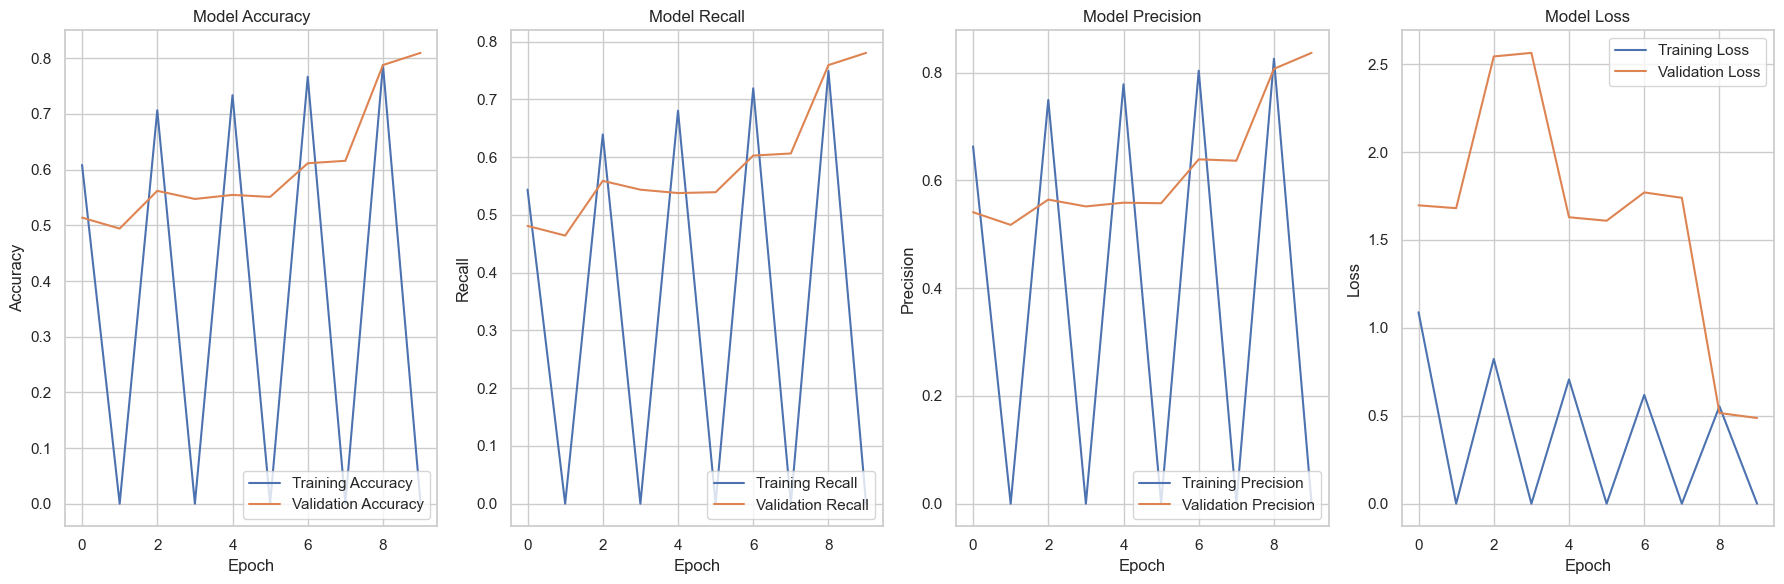

In [55]:
# Plot training & validation accuracy values
plt.figure(figsize=(18, 6))

# Accuracy Plot
plt.subplot(2, 4, 1)
plt.plot(hist_nn.history['accuracy'], label='Training Accuracy')
plt.plot(hist_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Recall Plot
plt.subplot(2, 4, 2)
plt.plot(hist_nn.history['recall'], label='Training Recall')
plt.plot(hist_nn.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(loc='lower right')

# Precision Plot
plt.subplot(2, 4, 3)
plt.plot(hist_nn.history['precision'], label='Training Precision')
plt.plot(hist_nn.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(2, 4, 4)
plt.plot(hist_nn.history['loss'], label='Training Loss')
plt.plot(hist_nn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

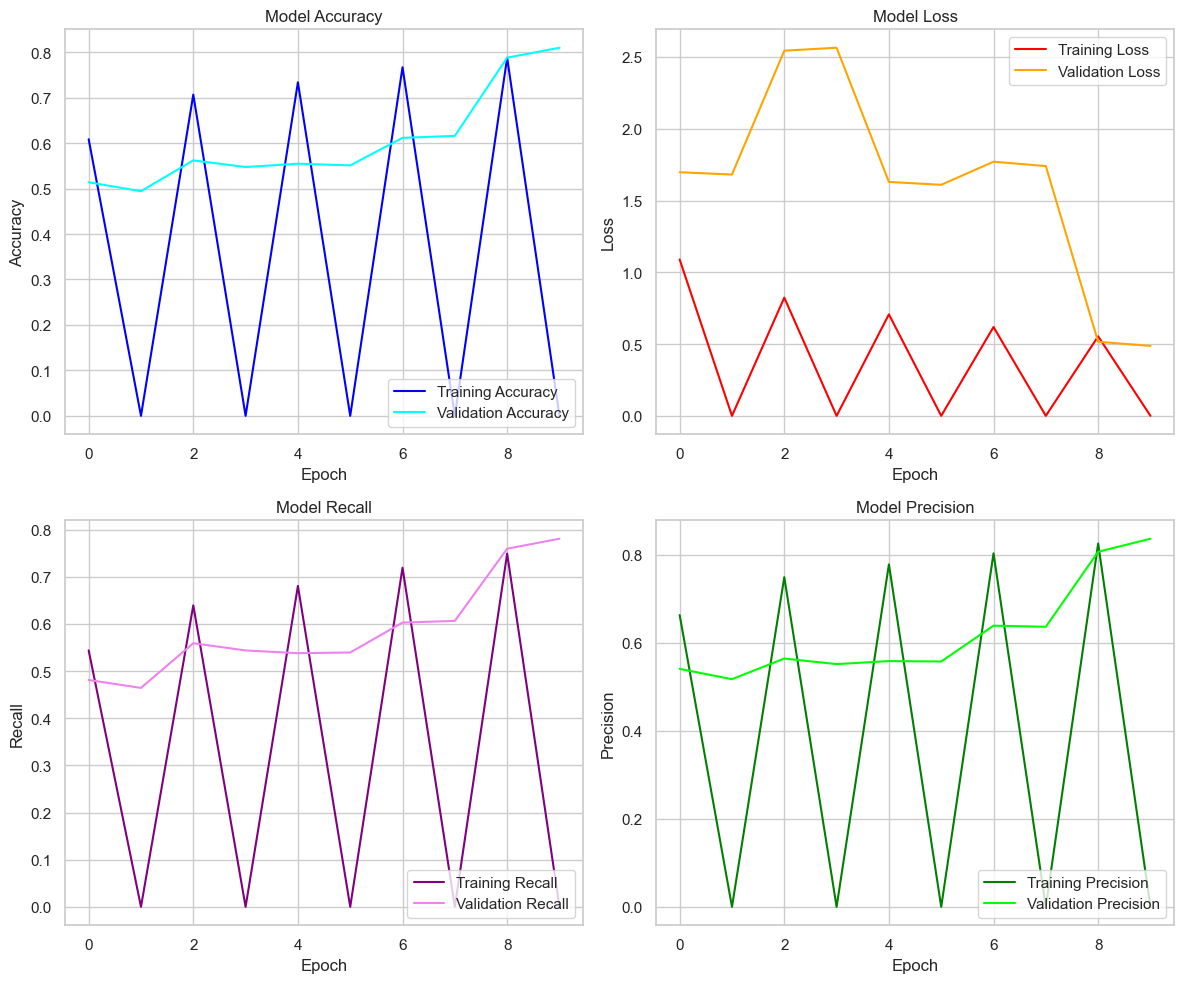

In [52]:
# Plot training & validation metrics
plt.figure(figsize=(12, 10))

# Row 1: Model Accuracy and Model Loss
# Model Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(hist_nn.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist_nn.history['val_accuracy'], label='Validation Accuracy', color='cyan')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Model Loss Plot
plt.subplot(2, 2, 2)
plt.plot(hist_nn.history['loss'], label='Training Loss', color='red')
plt.plot(hist_nn.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Row 2: Model Recall and Model Precision
# Model Recall Plot
plt.subplot(2, 2, 3)
plt.plot(hist_nn.history['recall'], label='Training Recall', color='purple')
plt.plot(hist_nn.history['val_recall'], label='Validation Recall', color='violet')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(loc='lower right')

# Model Precision Plot
plt.subplot(2, 2, 4)
plt.plot(hist_nn.history['precision'], label='Training Precision', color='green')
plt.plot(hist_nn.history['val_precision'], label='Validation Precision', color='lime')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

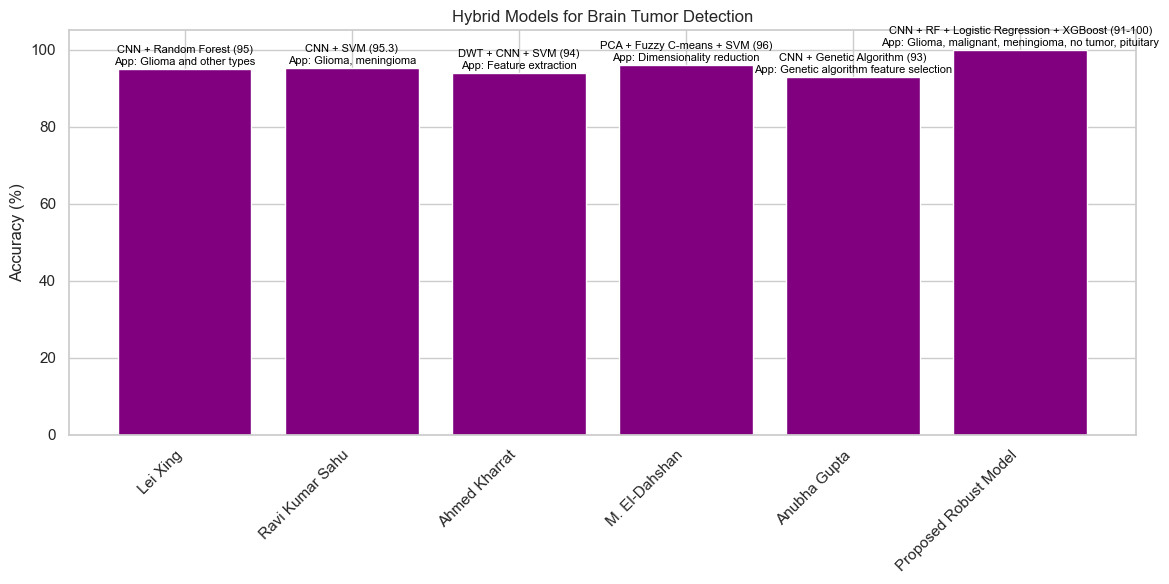

In [62]:
# Data for the plot
researchers = [
    "Lei Xing", "Ravi Kumar Sahu", "Ahmed Kharrat", 
    "M. El-Dahshan", "Anubha Gupta", "Proposed Robust Model"
]
models = [
    "CNN + Random Forest", "CNN + SVM", "DWT + CNN + SVM", 
    "PCA + Fuzzy C-means + SVM", "CNN + Genetic Algorithm", 
    "CNN + RF + Logistic Regression + XGBoost"
]
# Use a numerical representation for accuracy and set a value for the proposed model
accuracies = [95, 95.3, 94, 96, 93, 100]  # Average representation for plotting
accuracy_labels = ["95", "95.3", "94", "96", "93", "91-100"]  # Labels for display
applications = [
    "Glioma and other types", "Glioma, meningioma", "Feature extraction", 
    "Dimensionality reduction", "Genetic algorithm feature selection", 
    "Glioma, malignant, meningioma, no tumor, pituitary"
]

# Plot configuration
fig, ax = plt.subplots(figsize=(12, 6))

# Vertical bar plot for accuracies
x_pos = np.arange(len(researchers))
bars = ax.bar(x_pos, accuracies, color="purple")
ax.set_xticks(x_pos)
ax.set_xticklabels(researchers, rotation=45, ha="right")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Hybrid Models for Brain Tumor Detection")

# Adding the model and application text above each bar
for i, bar in enumerate(bars):
    # Use the accuracy_labels for display, not the numerical accuracies
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
            f"{models[i]} ({accuracy_labels[i]})\nApp: {applications[i]}", 
            ha='center', va='bottom', color="black", fontsize=8, wrap=True)

plt.tight_layout()
plt.show()